In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
# Reading dataset
df = pd.read_csv("data.csv")
# describe the dataset before cleaning
print(df.describe())
# cleaning the data
df.drop_duplicates(inplace=True)
median = df['Calories'].median()
df['Calories'].fillna(median, inplace=True)
# after cleaning
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  162 non-null    int64  
 1   Pulse     162 non-null    int64  
 2   Maxpulse  162 non-null    int64  
 3   Calories  162 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 6.3 KB
None
         Duration       Pulse    Maxpulse     Calories
count  162.000000  162.000000  162.000000   162.000000
mean    64.197531  107.709877  134.265432   377.593210
std     43.151882   14.711588   16.471618   267.291955
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   255.075000
50%     60.000000  105.500000  131.000000   320.400000
75%     60.000000  111.000000  141.000000   386.700000
max    300.000000  159.000000  184.000000  1860.400000


In [7]:
# set the general style of the plots
sns.set(style='white', context='paper', palette='deep')
# print the Correlation matrix
corr_matrix = df.corr()
print(corr_matrix)
# Visualizing correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()

          Duration     Pulse  Maxpulse  Calories
Duration  1.000000 -0.162098  0.003578  0.922754
Pulse    -0.162098  1.000000  0.787035  0.018594
Maxpulse  0.003578  0.787035  1.000000  0.196884
Calories  0.922754  0.018594  0.196884  1.000000


In [10]:
# The correlation matrix shows there that the highest correlation is between the Duration and Calories features
# print the correlation coefficient from the matrix
corr_coef = np.corrcoef(df["Duration"], df["Calories"])[0, 1]
print("Correlation between Duration and Calories:", round(corr_coef, 2))

Correlation between Duration and Calories: 0.92


In [11]:
# with t-test we check if the mean of the two groups are truly different
ttest, pval = stats.ttest_ind(df["Duration"], df["Calories"])
print("Independent t-test:", ttest, pval)

Independent t-test: -14.732537922067946 6.547333990685293e-38


Text(0.5, 1.0, 'Independent T-Test')

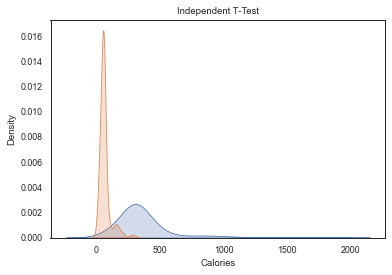

In [18]:
sns.kdeplot(df["Calories"], shade=True)
sns.kdeplot(df["Duration"], shade=True)
plt.title("Independent T-Test")

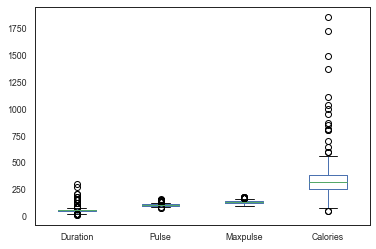

In [19]:
#Boxplot graph of all columns
df.plot(kind='box')
plt.show()

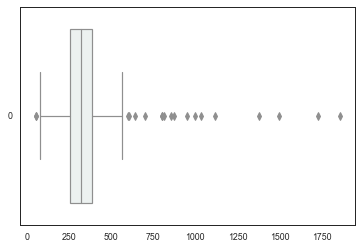

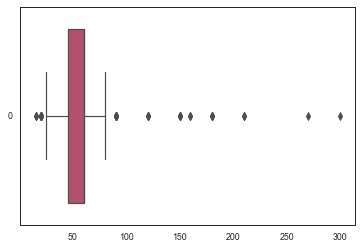

In [27]:
#Distribution of data in each class
cals = df["Calories"]
durs = df["Duration"]

ax = sns.boxplot(data=cals, orient="h", palette="light:#5A9")
plt.show()
ax = sns.boxplot(data=durs, orient="h", palette="flare")
plt.show()

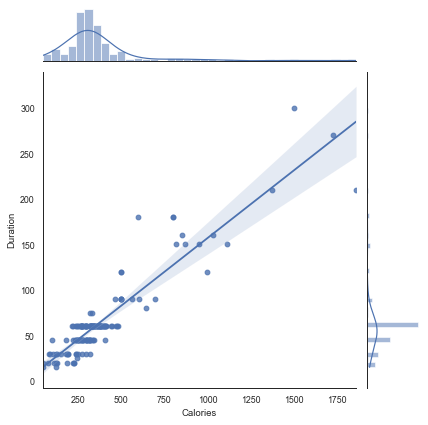

In [37]:
#Analysing correlation between Calories and Duration
sns.jointplot(kind="reg", x="Calories", y="Duration", data=df)
plt.show()

[8.34006357]
[[0.14853504]]


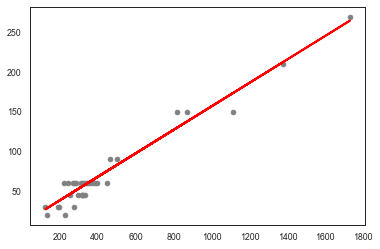

In [22]:
#Linear regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

X = df['Calories'].values.reshape(-1,1)
y = df['Duration'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor=LinearRegression()
regressor.fit(X_train, y_train)

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
#Prediction
y_pred = regressor.predict(X_test)

#Visualization
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()